### Import the libraries 

In [2]:
import pandas as pd
import numpy as np

## Pandas

`Pandas` stands for Python Data Analysis Library, it offers data structures and operations for manipulating numerical tables and time series, which comes handy for data manipulation and analysis.

### Load the data

Some common formats of data include ".csv"(comma-separated values), ".tsv"(tab-separated values), ".xls"(Excel spreadsheet), and ".json"(JSON with objects as rule lists). `pandas` provides useful functions to read them, such as `pd.read_csv()` and `pd.read_json`, which read in tabular data and convert them into a dataframe.

The data we are using today is a ".csv" file. We'll read the file and store the data in `df_2019`.

In [45]:
# The string in the parentheses is the path to the data file
df_2019 = pd.read_csv('data/WHR_2019.csv')

### Examine the data 

If you call `df_2019` directly, `pandas` will display the entire Dataframe. Imagine you have a million data points, your notebook will be extremely long. But do we need that much information to understand the data structure? No. So instead, we use `df.head()` to only show the first couple of lines. You can also indicate how many lines you want to see by calling `df.head(n)` if you want to display the first n rows.

In [46]:
df_2019.head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.88) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,La La Land,1000.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Finland,7.769,7.830,7.708,2.714,1.340,1.587,0.986,0.596,0.153,0.393
2,Denmark,7.600,7.667,7.534,2.393,1.383,1.573,0.996,0.592,0.252,0.410
3,Norway,7.554,7.616,7.492,2.241,1.488,1.582,1.028,0.603,0.271,0.341
4,Iceland,7.494,7.613,7.374,2.401,1.380,1.624,1.026,0.591,0.354,0.118


Let's check how many columns and rows are in this dataframe:

In [47]:
#This returns (# of rows, # of columns)
df_2019.shape

(157, 11)

The columns contain the Happiness scores and their related factors:

In [48]:
df_2019.columns

Index(['Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.88) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

Sometimes row indices can have specific meanings as well. But in our case, they are just index numbers:

In [60]:
df_2019.index

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            147, 148, 149, 150, 151, 152, 153, 154, 155, 156],
           dtype='int64', length=156)

You should have noticed the abnormity in the first row. In 'La La Land', there are a few 'NaN's, which indicate missing data in our dataframe. There might be different reasons why the data is truncated, such as, the survey wasn't able to capture the information for this country, or someone intentially deleted the data to bias the report. In our case, we added 'La La Land' on purpose to show you how to deal with missing data, and here it is:

In order to check if something is missing, we can use `df.isna()`: 

In [50]:
df_2019.isna().head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.88) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,False,False,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


Missing data don't always show up on the first couple of rows, so you may not be able to catch them if you only display the head of the dataframe. To better visualize how much data is missing for each column, we can sum them up:

In [51]:
df_2019.isna().sum()

Country                                       0
Happiness score                               0
Whisker-high                                  1
Whisker-low                                   1
Dystopia (1.88) + residual                    1
Explained by: GDP per capita                  1
Explained by: Social support                  1
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    1
Explained by: Generosity                      1
Explained by: Perceptions of corruption       1
dtype: int64

It looks like only 'La La Land' has missing data. One way to deal with missing data is to impute them. There are many ways to do data imputation, the easiest one will be fill them all with zeros. Conviniently, if you call `df.fillna(0)`, `pandas` would do it for us.

In [25]:
df_2015.fillna(0).head(1)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,La La Land,North America,1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Another option is to drop the rows that have missing data. This is usually not a good idea because we might be removing important information from our dataframe. But in our case, the first row is completely useless, so we'll drop the data. We can do that by calling `df.drop`. See [this documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) for more details. 

Make sure you understand what the two 0's stand for.

In [52]:
df_2019 = df_2019.drop(0,0)

You can reset the indices such that it starts from 0 again.

In [62]:
df_2019 = df_2019.reset_index(drop=True)

In [63]:
df_2019.head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.88) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.769,7.830,7.708,2.714,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,7.667,7.534,2.393,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,7.616,7.492,2.241,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,7.613,7.374,2.401,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,7.542,7.433,2.393,1.396,1.522,0.999,0.557,0.322,0.298


Other than looking at what the data exactly look like, we also want to examine the values and the existence of outliers. How can we do that? We can examine the data's mean, min, max, etc. We can certainly use `numpy` and compute these values column by column, but if we have a lot of columns, this might be too much work. Luckily, `pandas` has a function called `df.describe()` that makes things easy.

In [64]:
df_2019.describe()

,Happiness score,Whisker-high,Whisker-low,Dystopia (1.88) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,5.407096,5.511968,5.302122,1.879936,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,1.113120,1.098572,1.128566,0.528797,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,2.853000,3.005000,2.701000,0.183000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.544500,4.665000,4.436500,1.513250,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,5.379500,5.471500,5.285500,1.917000,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,6.184500,6.276000,6.070500,2.267500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,7.769000,7.830000,7.708000,3.049000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


### Slicing

`df.loc[row, column]` selects a subset of `df`: 

In [65]:
#Get row 1 column Country
df_2019.loc[0, 'Country']

'Finland'

In [67]:
#Get rows 1 to 5 columns "Explained by: GDP per capita" through "Explained by: Generosity" inclusive
df_2019.loc[1:5, "Explained by: GDP per capita":"Explained by: Generosity"]

,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity
1,1.383,1.573,0.996,0.592,0.252
2,1.488,1.582,1.028,0.603,0.271
3,1.380,1.624,1.026,0.591,0.354
4,1.396,1.522,0.999,0.557,0.322
5,1.452,1.526,1.052,0.572,0.263


In [69]:
#Select the "Happiness score" column
df_2019.loc[:, "Happiness score"]

0      7.769
1      7.600
2      7.554
3      7.494
4      7.488
       ...  
151    3.334
152    3.231
153    3.203
154    3.083
155    2.853
Name: Happiness score, Length: 156, dtype: float64

Selecting a single column from a dataframe produces a `pandas` Series. It's similar to a numpy array since we we can perform arithmetic on all the elements at once.

In [70]:
df_2019.loc[:, "Happiness score"].max()

7.769

To select specific columns, we can pass a list into the `.loc` slice:

In [71]:
df_2019.loc[:, ["Country", "Happiness score"]]

,Country,Happiness score
0,Finland,7.769
1,Denmark,7.600
2,Norway,7.554
3,Iceland,7.494
4,Netherlands,7.488
...,...,...
151,Rwanda,3.334
152,Tanzania,3.231
153,Afghanistan,3.203
154,Central African Republic,3.083


Shorthand for selecting columns:

In [72]:
#shorthand for df_2019.loc[:, "Happiness score"]
df_2019["Happiness score"]

0      7.769
1      7.600
2      7.554
3      7.494
4      7.488
       ...  
151    3.334
152    3.231
153    3.203
154    3.083
155    2.853
Name: Happiness score, Length: 156, dtype: float64

As mentioned before, selecting a single column results in a Series. If you want a dataframe, pass a list into the `.loc` slice just like we did with multiple columns:

In [74]:
df_2019[["Happiness score"]]

,Happiness score
0,7.769
1,7.600
2,7.554
3,7.494
4,7.488
...,...
151,3.334
152,3.231
153,3.203
154,3.083


In [73]:
#shorthand for df_2019.loc[:, ["Country", "Happiness score"]]
df_2019[["Country", "Happiness score"]]

,Country,Happiness score
0,Finland,7.769
1,Denmark,7.600
2,Norway,7.554
3,Iceland,7.494
4,Netherlands,7.488
...,...,...
151,Rwanda,3.334
152,Tanzania,3.231
153,Afghanistan,3.203
154,Central African Republic,3.083


`pandas` dataframs also support conditional operations:

In [119]:
#This gives all countries that have Happiness scores higher than 7
df_2019[df_2019['Happiness score'] > 7]

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.88) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.769,7.830,7.708,2.714,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,7.667,7.534,2.393,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,7.616,7.492,2.241,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,7.613,7.374,2.401,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,7.542,7.433,2.393,1.396,1.522,0.999,0.557,0.322,0.298
5,Switzerland,7.480,7.553,7.408,2.272,1.452,1.526,1.052,0.572,0.263,0.343
6,Sweden,7.343,7.416,7.270,2.246,1.387,1.487,1.009,0.574,0.267,0.373
7,New Zealand,7.307,7.383,7.232,2.127,1.303,1.557,1.026,0.585,0.330,0.380
8,Canada,7.278,7.357,7.200,2.193,1.365,1.505,1.039,0.584,0.285,0.308
9,Austria,7.246,7.313,7.179,2.378,1.376,1.475,1.016,0.532,0.244,0.226


`df.iloc` is another way to select subsets of a dataframe. It works like `df.loc` but takes in numerical indices instead of labels. And it does **not** include the right endpoint in its slices, like Python's list slicing.

In [75]:
#Notice how index 3 is not included 
df_2019.iloc[:3, :]

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.88) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.769,7.830,7.708,2.714,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,7.667,7.534,2.393,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,7.616,7.492,2.241,1.488,1.582,1.028,0.603,0.271,0.341


In [136]:
#Notice how the following returns an error
df_2019.loc[:, :3]

TypeError: cannot do slice indexing on <class 'pandas.core.indexes.base.Index'> with these indexers [3] of <class 'int'>

This will only work when there's a column named 3.

In [135]:
df_2019.iloc[:, :3]

,Country,Happiness score,Whisker-high
0,Finland,7.769,7.830
1,Denmark,7.600,7.667
2,Norway,7.554,7.616
3,Iceland,7.494,7.613
4,Netherlands,7.488,7.542
...,...,...,...
151,Rwanda,3.334,3.425
152,Tanzania,3.231,3.347
153,Afghanistan,3.203,3.278
154,Central African Republic,3.083,3.227


:)

### Sorting

Let's sort the rows in descending order by "Happiness score". Note that the default order is ascending.

In [77]:
df_2019.sort_values('Happiness score', ascending = False).head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.88) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.769,7.830,7.708,2.714,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,7.667,7.534,2.393,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,7.616,7.492,2.241,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,7.613,7.374,2.401,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,7.542,7.433,2.393,1.396,1.522,0.999,0.557,0.322,0.298


### Groupby

Now we've examined the Happiness scores and related factors in 2019. Let's look at the the measurements made from previous years. This can be found in the 'WHR_prev.xlsx' file stored in the 'data' folder.

In [81]:
#read in the excel file
df_prev = pd.read_excel('data/WHR_prev.xlsx')
df_prev.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,...,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-16","gini of household income reported in Gallup, by wp5-year","Most people can be trusted, Gallup","Most people can be trusted, WVS round 1981-1984","Most people can be trusted, WVS round 1989-1993","Most people can be trusted, WVS round 1994-1998","Most people can be trusted, WVS round 1999-2004","Most people can be trusted, WVS round 2005-2009","Most people can be trusted, WVS round 2010-2014"
0,Afghanistan,2008,3.723590,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686,0.517637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035,0.583926,...,NaN,NaN,0.441906,0.286315,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,2010,4.758381,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766,0.618265,...,NaN,NaN,0.327318,0.275833,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2011,3.831719,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109,0.611387,...,NaN,NaN,0.336764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,2012,3.782938,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620,0.710385,...,NaN,NaN,0.344540,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's take a look at the columns:

In [84]:
df_prev.columns

Index(['Country name', 'Year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect',
       'Confidence in national government', 'Democratic Quality',
       'Delivery Quality', 'Standard deviation of ladder by country-year',
       'Standard deviation/Mean of ladder by country-year',
       'GINI index (World Bank estimate)',
       'GINI index (World Bank estimate), average 2000-16',
       'gini of household income reported in Gallup, by wp5-year',
       'Most people can be trusted, Gallup',
       'Most people can be trusted, WVS round 1981-1984',
       'Most people can be trusted, WVS round 1989-1993',
       'Most people can be trusted, WVS round 1994-1998',
       'Most people can be trusted, WVS round 1999-2004',
       'Most people can be trusted, WVS round 2005-2009',
       'Most people can be trusted, WV

For simplicity, we'll only look at the columns that are also included in `df_2019`, and fill all the `NaN`s with 0s:

In [115]:
df_prev = df_prev[['Country name', 'Year','Log GDP per capita',
                   'Social support', 'Healthy life expectancy at birth',
                   'Freedom to make life choices', 'Generosity',
                   'Perceptions of corruption']]
df_prev = df_prev.fillna(0)
df_prev.head()

,Country name,Year,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2008,7.168690,0.450662,50.799999,0.718114,0.177889,0.881686
1,Afghanistan,2009,7.333790,0.552308,51.200001,0.678896,0.200178,0.850035
2,Afghanistan,2010,7.386629,0.539075,51.599998,0.600127,0.134353,0.706766
3,Afghanistan,2011,7.415019,0.521104,51.919998,0.495901,0.172137,0.731109
4,Afghanistan,2012,7.517126,0.520637,52.240002,0.530935,0.244273,0.775620


Say we want to find the average 'Social support' for each country, we can use `pandas` `groupby` method. `df.groupby()` returns a DataFrameGroupBy object. We can call .agg() on this object with an aggregation function to get a desired output.

In [92]:
df_prev.groupby('Country name')

In [99]:
df_prev[['Country name', 'Social support']].groupby('Country name').mean()

,Social support
Country name,
Afghanistan,0.516270
Albania,0.719602
Algeria,0.803636
Angola,0.737973
Argentina,0.905605
...,...
Venezuela,0.919880
Vietnam,0.827595
Yemen,0.727963


You can also perform different aggregation functions on different columns:

In [102]:
df_prev[['Country name', 'Social support', 
         'Healthy life expectancy at birth']].groupby('Country name'
                                                     ).agg({'Social support': 'mean',
                                                           'Healthy life expectancy at birth': 'max'})

,Social support,Healthy life expectancy at birth
Country name,,
Afghanistan,0.516270,53.200001
Albania,0.719602,68.699997
Algeria,0.803636,65.900002
Angola,0.737973,54.599998
Argentina,0.905605,68.800003
...,...,...
Venezuela,0.919880,66.500000
Vietnam,0.827595,67.900002
Yemen,0.727963,56.700001


### Pivoting

If you want to group by two columns, pivoting usually provides a better result:

In [114]:
pd.pivot_table(df_prev[['Country name', 'Year', 'Social support']],
                           index='Country name',         # Index for rows
                           columns='Year',               # Columns
                           values='Social support',      # Values in table
                           aggfunc = max)                 # Aggregation function

Year,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country name,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,0.450662,0.552308,0.539075,0.521104,0.520637,0.483552,0.525568,0.528597,0.559072,0.490880,0.507516
Albania,NaN,NaN,0.821372,NaN,0.833047,0.733152,0.759434,0.784502,0.759477,0.625587,0.639356,0.638411,0.637698,0.683592
Algeria,NaN,NaN,NaN,NaN,NaN,0.000000,0.810234,0.839397,NaN,0.818189,NaN,0.748588,0.806754,0.798651
Angola,NaN,NaN,NaN,NaN,NaN,NaN,0.723094,0.752593,0.721591,0.754615,NaN,NaN,NaN,NaN
Argentina,NaN,0.938463,0.862206,0.892195,0.918693,0.926799,0.889073,0.901776,0.909874,0.917870,0.926492,0.882819,0.906699,0.899912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,0.955278,0.946310,NaN,0.922434,0.944541,0.931576,0.930620,0.931630,0.896301,0.903956,0.911087,0.901949,0.895879,0.886882
Vietnam,NaN,0.887664,0.856023,0.804560,0.815026,0.786611,0.897655,0.775009,0.759477,0.792168,0.848677,0.876324,0.000000,0.831945
Yemen,NaN,NaN,0.824969,NaN,0.756430,0.726612,0.662680,0.681678,0.693905,0.638252,0.668683,0.775407,0.789555,0.789422


Question: We got rid of all `NaN`s a few code blocks ago. Why are there still `NaN`s here?

### Merge, join, and concatenate

Read more: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

Let's go back to `df_2019`. For practice, we'll split `df_2019` into pieces and concatenate them back together. 

In [123]:
df_2019.head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.88) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.769,7.830,7.708,2.714,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,7.667,7.534,2.393,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,7.616,7.492,2.241,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,7.613,7.374,2.401,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,7.542,7.433,2.393,1.396,1.522,0.999,0.557,0.322,0.298


In [130]:
# Select the first 50 rows as toy dataframe 1, the rest as toy dataframe 2
toy_1 = df_2019.loc[:49, :]
toy_2 = df_2019.loc[50:, :]
# Select the first 2 columns as toy dataframe 3, the rest as toy dataframe 4
toy_3 = df_2019.iloc[:, :2]
toy_4 = df_2019.iloc[:, 2:]

`pd.concat()` takes in dataframs and concatenates them based on the axis we choose:

Let's first combine the first two toy dataframes back to `df_2019`. Another way of saying that is concatenating along the rows:

In [150]:
pd.concat([toy_1, toy_2], axis = 0).head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.88) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.769,7.830,7.708,2.714,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,7.667,7.534,2.393,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,7.616,7.492,2.241,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,7.613,7.374,2.401,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,7.542,7.433,2.393,1.396,1.522,0.999,0.557,0.322,0.298


Sine the default axis to concatenate along is 0(row), we can omit `axis = 0`:

In [151]:
pd.concat([toy_1, toy_2]).head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.88) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.769,7.830,7.708,2.714,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,7.667,7.534,2.393,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,7.616,7.492,2.241,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,7.613,7.374,2.401,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,7.542,7.433,2.393,1.396,1.522,0.999,0.557,0.322,0.298


A useful shortcut to `concat()` are the `append()` instance methods on Series and DataFrame:

In [169]:
toy_1.append(toy_2).head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.88) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.769,7.830,7.708,2.714,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,7.667,7.534,2.393,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,7.616,7.492,2.241,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,7.613,7.374,2.401,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,7.542,7.433,2.393,1.396,1.522,0.999,0.557,0.322,0.298


Now let's concatenate along columns using by adding `axis = 1`:

In [153]:
pd.concat([toy_3, toy_4], axis = 1).head()

,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.88) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,Finland,7.769,7.830,7.708,2.714,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,7.600,7.667,7.534,2.393,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,7.554,7.616,7.492,2.241,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,7.494,7.613,7.374,2.401,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,7.488,7.542,7.433,2.393,1.396,1.522,0.999,0.557,0.322,0.298


The above resulting dataframes were exactly the same as `df_2019`.

We can concatenate more than 2 dataframes by putting the dataframes into a list:

In [155]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])
 

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                    index=[8, 9, 10, 11])

result = pd.concat([df1, df2, df3])

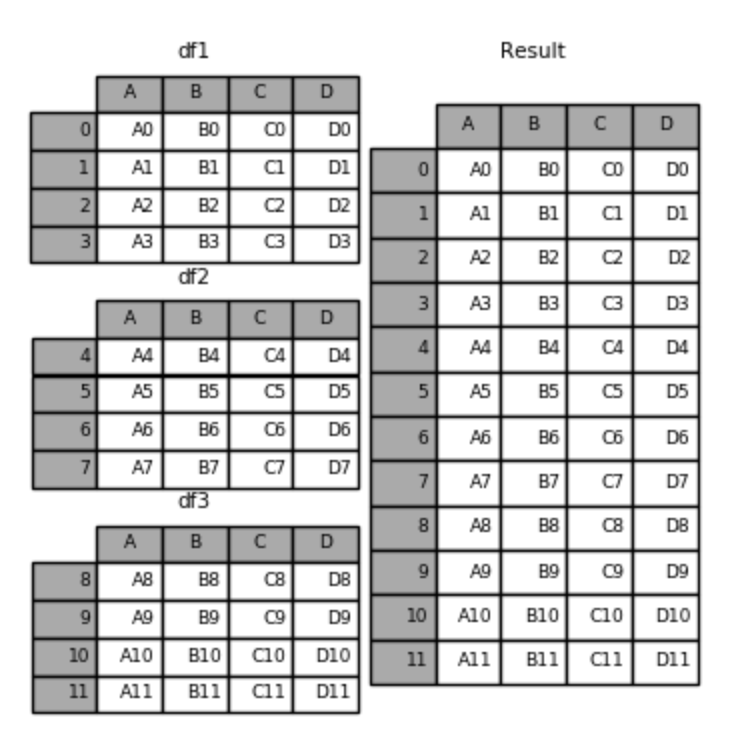

When gluing together multiple DataFrames, you have a choice of how to handle the other axes (other than the one being concatenated). This can be done in the following two ways:

- Take the union of them all, join='outer'. This is the default option as it results in zero information loss.
- Take the intersection, join='inner'.

In [160]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'],
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                    index=[2, 3, 6, 7])
#Omiting default join="outer"
result = pd.concat([df1, df4], axis=1)

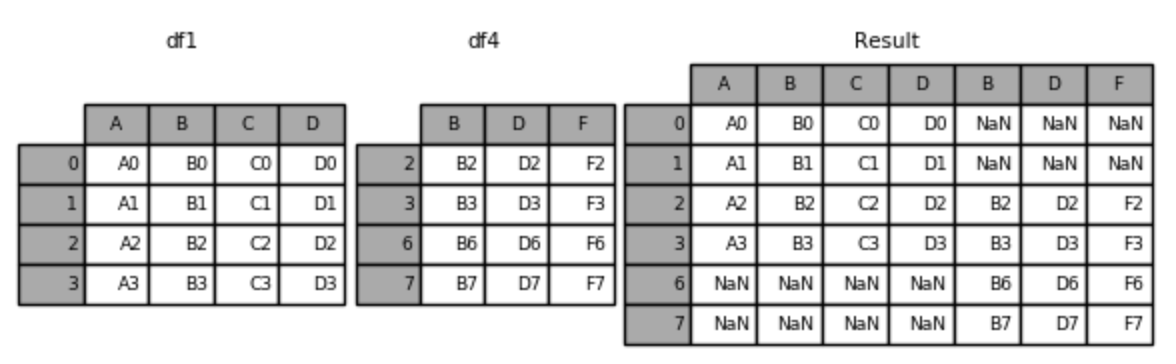

Notice that some entries that only show up in one of the dataframes ended up as `NaN`s.

In [161]:
#Now let's try inner join them
result = pd.concat([df1, df4], axis=1, join='inner')

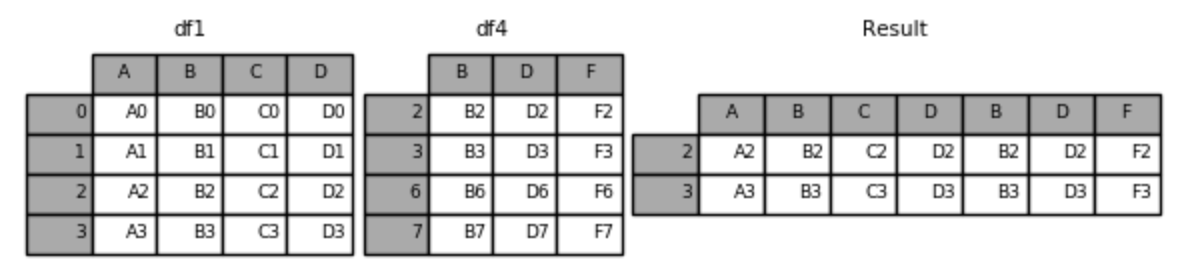

Inner join only takes entries that are in common.

For DataFrame objects which don’t have a meaningful index, you may wish to append them and ignore the fact that they may have overlapping indexes. To do this, use the `ignore_index` argument:

In [167]:
result = pd.concat([df1, df4], ignore_index = True, sort = False)

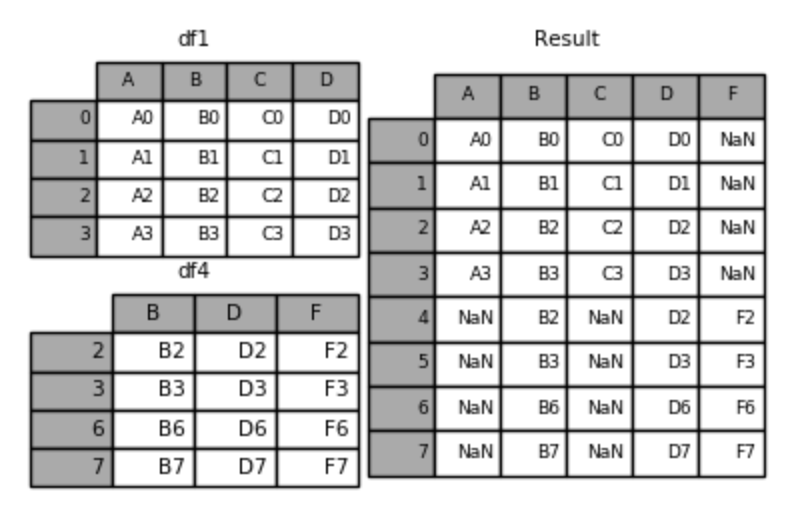

In [170]:
s2 = pd.Series(['X0', 'X1', 'X2', 'X3'], index=['A', 'B', 'C', 'D'])
result = df1.append(s2, ignore_index=True)

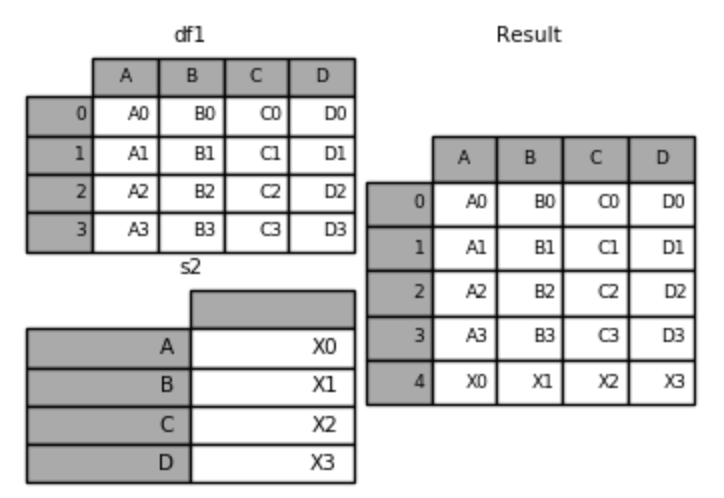

`pandas` also provides a single function, `merge()`, as the entry point for all standard database join operations between DataFrame or named Series objects:

```
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True,
         suffixes=('_x', '_y'), copy=True, indicator=False,
         validate=None)
```

In [173]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']}) 

result = pd.merge(left, right, on='key')

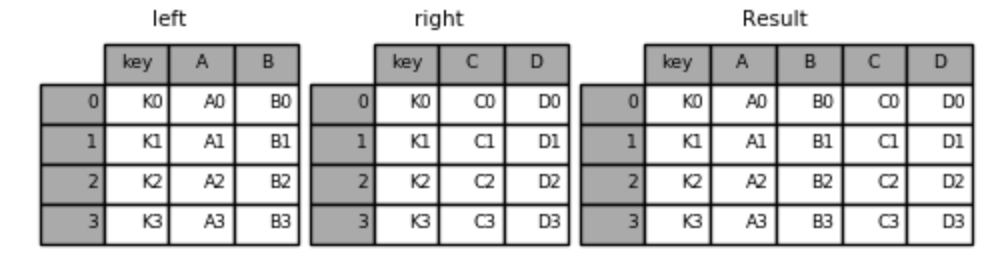

There are four merging methods:
- `left`: Use keys from left frame only
- `right`: Use keys from right frame only
- `outer`: Use union of keys from both frames
- `inner`: Use intersection of keys from both frames

In [177]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

result = pd.merge(left, right, how='left', on=['key1', 'key2'])

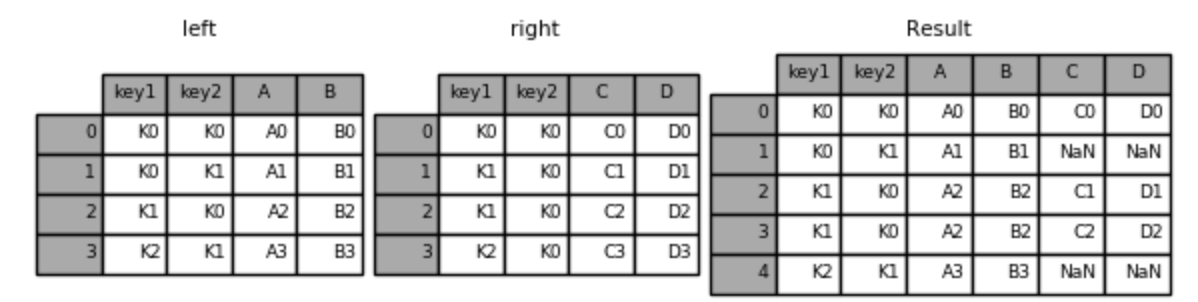